In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path

In [3]:
print("Number OF Trainning Images:"+ str(len(os.listdir("D:/globalwheet/global-wheat-detection/train"))))
print("Number OF Testing Images:"+ str(len(os.listdir("D:/globalwheet/global-wheat-detection/test"))))

Number OF Trainning Images:3422
Number OF Testing Images:10


Size of the image is : (1024, 1024, 3)


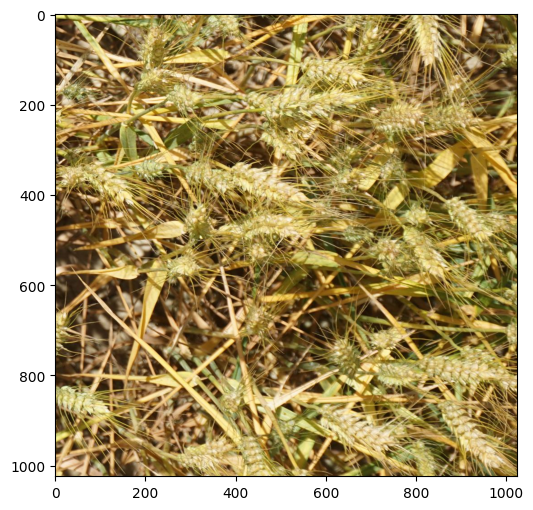

In [4]:
Train_img=load_img("D:/globalwheet/global-wheat-detection/train/00333207f.jpg")
train_img=img_to_array(Train_img)
print("Size of the image is :", train_img.shape)
%matplotlib inline
plt.figure(figsize=(6,6))
plt.imshow(Train_img)

In [5]:
df=pd.read_csv(r'D:/globalwheet/global-wheat-detection/train.csv')
df

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1
...,...,...,...,...,...
147788,5e0747034,1024,1024,"[64.0, 619.0, 84.0, 95.0]",arvalis_2
147789,5e0747034,1024,1024,"[292.0, 549.0, 107.0, 82.0]",arvalis_2
147790,5e0747034,1024,1024,"[134.0, 228.0, 141.0, 71.0]",arvalis_2
147791,5e0747034,1024,1024,"[430.0, 13.0, 184.0, 79.0]",arvalis_2


In [6]:
bboxs = np.stack(df['bbox'].apply(lambda x: np.fromstring(x[1:-1], sep=',')))
for i, column in enumerate(['x', 'y', 'width', 'hieght']):
    df[column] = bboxs[:,i] 
      
df.drop(columns=['bbox'], inplace=True)
df['x_center'] = df['x'] + df['width']/2
df['y_center'] = df['y'] + df['hieght']/2
df['classes'] = 0

df['x_center'] = df['x_center']/1024
df['y_center'] = df['y_center']/1024
df['width'] = df['width']/1024
df['hieght'] = df['hieght']/1024
df = df[['image_id', 'width', 'hieght','x_center','y_center','classes']]
df.head()

,image_id,width,hieght,x_center,y_center,classes
0,b6ab77fd7,0.054688,0.035156,0.841797,0.234375,0
1,b6ab77fd7,0.126953,0.056641,0.284180,0.563477,0
2,b6ab77fd7,0.072266,0.156250,0.404297,0.570312,0
3,b6ab77fd7,0.106445,0.104492,0.867676,0.145020,0
4,b6ab77fd7,0.121094,0.114258,0.085938,0.197754,0


In [7]:
df.classes.nunique()

1

In [8]:
Path('D:/globalwheet/Dataset', parents=True, exist_ok=True).mkdir()

In [11]:
from tqdm import tqdm 
import shutil as sh

In [12]:
index = list(set(df.image_id))

In [14]:
Path('D:/globalwheet/Dataset/train/').mkdir(parents=True, exist_ok=True)
Path('D:/globalwheet/Dataset/val/').mkdir(parents=True, exist_ok=True)

In [15]:
source = 'train'

if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            # print(f"name: {name} ::mini {mini}")
            
            if name in val_index:
                path2save = 'D:/globalwheet/Dataset/val/'
            else:
                path2save = 'D:/globalwheet/Dataset/train/'

            with open(path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','width','hieght']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write(" \n  ")
            # if not os.path.exists('/kaggle/working/Data/images/{}'.format(path2save)):
            #     os.makedirs('/kaggle/working/Data/images/{}'.format(path2save))
            sh.copy(f"D:/globalwheet/global-wheat-detection/train/{name}.jpg", f'{path2save}/{name}.jpg')

100%|██████████| 3373/3373 [01:01<00:00, 54.43it/s] 
